In [31]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


# Add the src folder to the system path
project_path = os.path.abspath('..')  # Adjust based on the actual project structure
src_path = os.path.join(project_path, 'src')
if src_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(src_path)

# Set visualization style
sns.set(style="whitegrid")

# File paths
csv_file_path = "MachineLearningRating_v3.csv"

# Load data
from helpers import load_data,create_groups, perform_chi2_test, perform_t_test
from preprocessing import handle_missing_values




In [32]:
data = load_data(csv_file_path)

# Display data structure and summary
print("Data Overview:")
data.info()

# Display first few rows
data.head()

c:\users\hp\Documents\alpha-care-insurance-analytics\src\helpers.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file_path)


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# Handle missing values
data = handle_missing_values(data)

# Check for remaining missing values
data.isnull().sum()
data.describe()


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,2.212193e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,2.650521e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,2.200000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.200000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


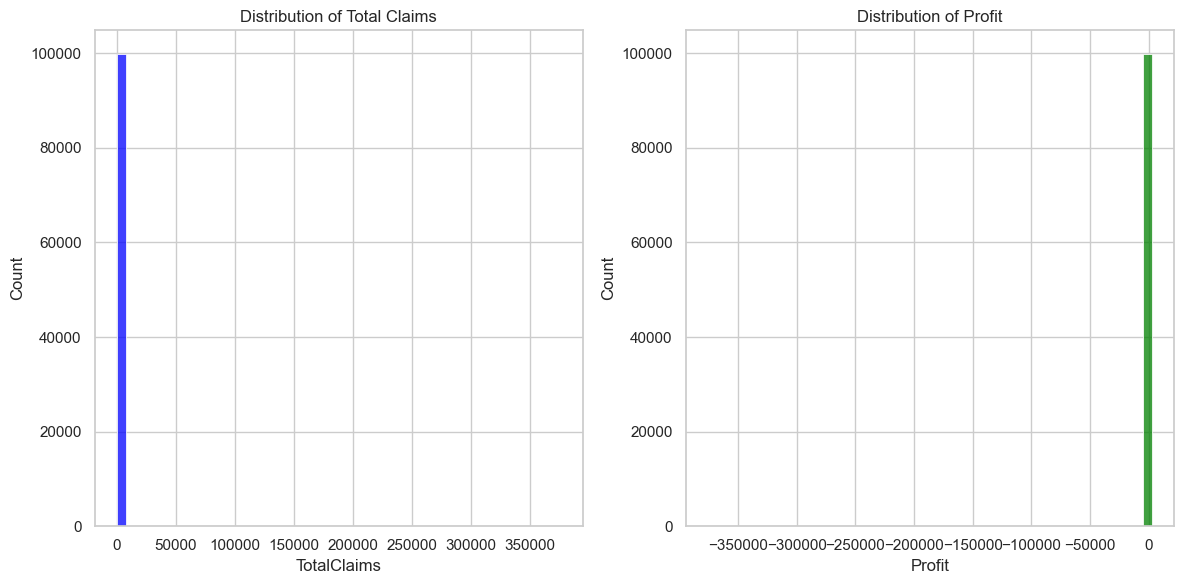

In [30]:


# Calculate Profit column
data['Profit'] = data['TotalPremium'] - data['TotalClaims']

# Sample data for visualization (adjust sample size if needed)
sample_data = data.sample(100000) if len(data) > 100000 else data

# Visualize distribution of TotalClaims and Profit
plt.figure(figsize=(12, 6))

# Distribution of Total Claims
plt.subplot(1, 2, 1)
sns.histplot(sample_data['TotalClaims'], bins=50, kde=False, color='blue')
plt.title('Distribution of Total Claims')

# Distribution of Profit
plt.subplot(1, 2, 2)
sns.histplot(sample_data['Profit'], bins=50, kde=False, color='green')
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_17456\1519289362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='viridis')


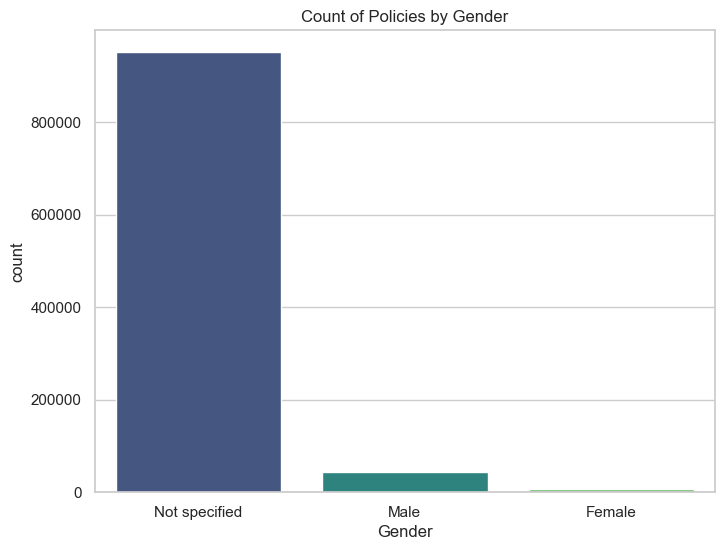

In [10]:


# Example: Segmentation by Gender
group_a_gender, group_b_gender = create_groups(data, 'Gender', 'Male', 'Female')

# Visualize segmentation by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Count of Policies by Gender')
plt.show()

In [11]:
def calculate_risk_ratio(data, group_column, target_column='TotalClaims'):
    """Calculate risk ratio for different groups."""
    risk_metrics = data.groupby(group_column).agg({
        target_column: ['count', 'mean', 'std']
    }).round(2)
    risk_metrics.columns = ['count', 'mean_claims', 'std_claims']
    return risk_metrics

In [12]:
# Hypothesis 1: Risk differences across provinces
# Hypothesis 1 - Risk differences across provinces
print("Hypothesis 1: Risk differences across provinces")
province_risks = calculate_risk_ratio(data, 'Province')
print("\nRisk metrics by province:")
print(province_risks)
print("Hypothesis 1: Risk Differences Across Provinces")
p_province = perform_chi2_test(data, 'Province', 'TotalClaims')
print(f"Chi-squared Test p-value: {p_province}")

Hypothesis 1: Risk differences across provinces

Risk metrics by province:
                count  mean_claims  std_claims
Province                                      
Eastern Cape    30336        44.71     2343.61
Free State       8099        43.82     2074.34
Gauteng        393865        74.63     2450.12
KwaZulu-Natal  169781        84.23     2737.97
Limpopo         24836        40.93     1627.59
Mpumalanga      52718        38.79     1651.36
North West     143287        41.32     1834.83
Northern Cape    6380        14.03      513.86
Western Cape   170796        60.83     2596.94
Hypothesis 1: Risk Differences Across Provinces
Chi-squared Test p-value: 1.0


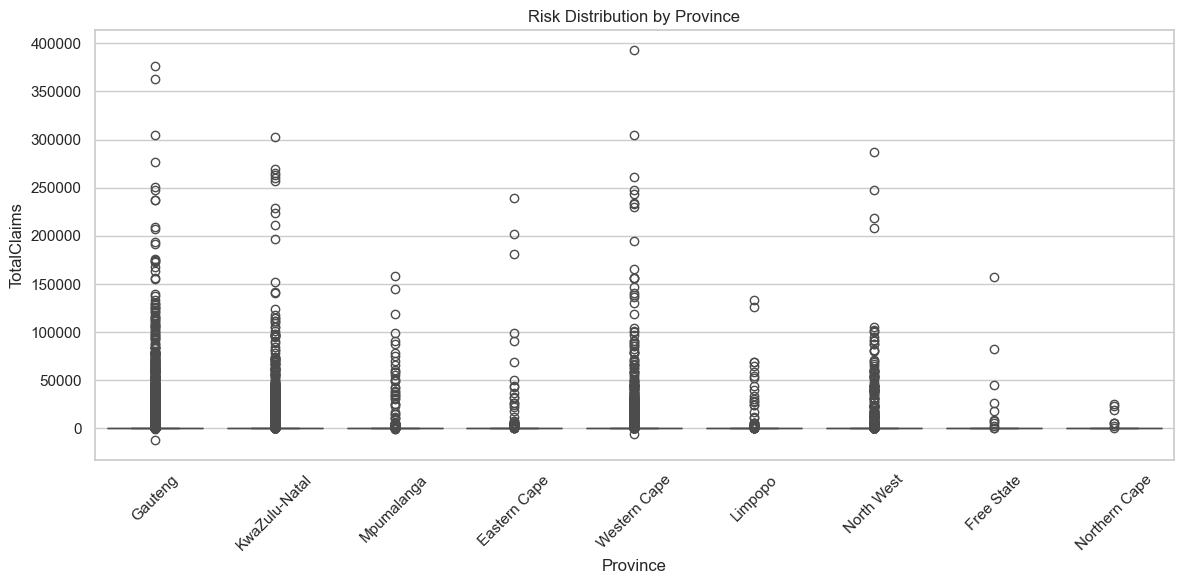

In [14]:
# Visualize province risks
from visualizations import plot_risk_comparison
plt_province = plot_risk_comparison(data, 'Province')
plt.show()

In [19]:
print(data['PostalCode'].value_counts().head(10))  # Top 10 zip codes by count


PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
458      13775
8000     11794
2196     11048
470      10226
7100     10161
Name: count, dtype: int64


Hypothesis 2: Risk differences between zip codes

Top 5 and bottom 5 zip codes by risk:
            count  mean_claims  std_claims
PostalCode                                
466            18      2192.98     9304.04
2920           55      1758.28     8574.98
1342          110      1548.41    14002.63
1751           77      1343.31    11438.36
9756          132      1193.34    13710.39

             count  mean_claims  std_claims
PostalCode                                
1471          620        -0.41        10.3
4              77         0.00         0.0
7             356         0.00         0.0
17            160         0.00         0.0
22            605         0.00         0.0


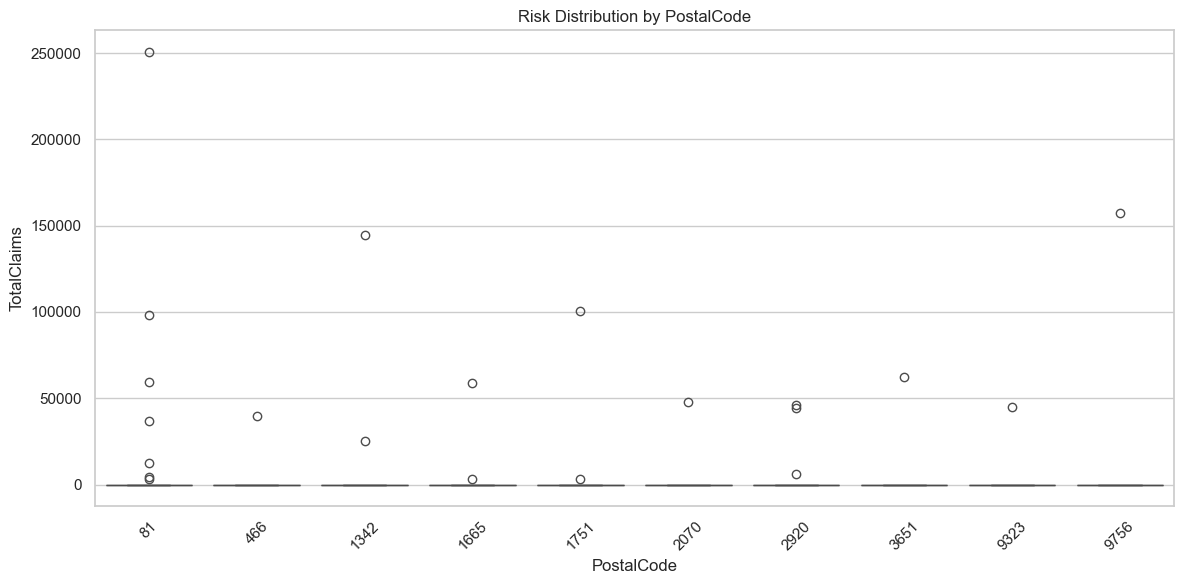

In [17]:
# Cell 3: Hypothesis 2 - Risk differences between zip codes
print("Hypothesis 2: Risk differences between zip codes")
zipcode_risks = calculate_risk_ratio(data, 'PostalCode')
print("\nTop 5 and bottom 5 zip codes by risk:")
print(zipcode_risks.nlargest(5, 'mean_claims'))
print("\n", zipcode_risks.nsmallest(5, 'mean_claims'))
# Visualize top 10 zipcodes by risk
top_10_zipcodes = zipcode_risks.nlargest(10, 'mean_claims').index
plt_zipcode = plot_risk_comparison(data[data['PostalCode'].isin(top_10_zipcodes)], 
                                 'PostalCode')
plt.show()

In [25]:
# Hypothesis 2: Risk Differences Between Zip Codes
print("Hypothesis 2: Risk Differences Between Zip Codes")

# Replace non-existent zip codes with valid ones
valid_zip_a = 2000  # Replace with a valid zip code
valid_zip_b = 122   # Replace with another valid zip code

# Create groups based on valid zip codes
group_a_zip, group_b_zip = create_groups(data, 'PostalCode', valid_zip_a, valid_zip_b)

# Check group sizes
print(f"Size of Group A (Zip {valid_zip_a}): {len(group_a_zip)}")
print(f"Size of Group B (Zip {valid_zip_b}): {len(group_b_zip)}")

# Perform t-test if groups are sufficiently large
if len(group_a_zip) > 5 and len(group_b_zip) > 5:
    p_zip = perform_t_test(group_a_zip, group_b_zip, 'TotalClaims')
    print(f"t-Test p-value (Valid Zip Codes): {p_zip}")
else:
    print("Groups are too small for t-test. Consider using alternative grouping.")


Hypothesis 2: Risk Differences Between Zip Codes
Size of Group A (Zip 2000): 133498
Size of Group B (Zip 122): 49171
t-Test p-value (Valid Zip Codes): 0.5022856048770837


In [29]:
# Hypothesis 3: Profit Differences Between Zip Codes
print("Hypothesis 3: Profit Differences Between Zip Codes")

# Replace non-existent zip codes with valid ones
valid_zip_a = 2000  # Replace with a valid zip code
valid_zip_b = 122   # Replace with another valid zip code

# Create groups based on valid zip codes
group_a_zip, group_b_zip = create_groups(data, 'PostalCode', valid_zip_a, valid_zip_b)

# Check group sizes
print(f"Size of Group A (Zip {valid_zip_a}): {len(group_a_zip)}")
print(f"Size of Group B (Zip {valid_zip_b}): {len(group_b_zip)}")

# Perform t-test if groups are sufficiently large
if len(group_a_zip) > 5 and len(group_b_zip) > 5:
    p_profit = perform_t_test(group_a_zip, group_b_zip, 'Profit')
    print(f"t-Test p-value (Valid Zip Codes): {p_profit}")
else:
    print("Groups are too small for t-test. Consider using alternative grouping.")


Hypothesis 3: Profit Differences Between Zip Codes
Size of Group A (Zip 2000): 133498
Size of Group B (Zip 122): 49171
t-Test p-value (Valid Zip Codes): 0.1959089836855574


In [27]:

def plot_margin_comparison(data, group_column):
    """Create violin plot comparing margin distribution between groups."""
    data['Margin'] = data['TotalPremium'] - data['TotalClaims']
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=group_column, y='Margin', data=data)
    plt.xticks(rotation=45)
    plt.title(f'Margin Distribution by {group_column}')
    plt.tight_layout()
    return plt

In [24]:
def calculate_profit_margin(data, group_column):
    """Calculate profit margin for different groups."""
    data['Margin'] = data['TotalPremium'] - data['TotalClaims']
    margin_metrics = data.groupby(group_column).agg({
        'Margin': ['mean', 'std', 'count']
    }).round(2)
    margin_metrics.columns = ['mean_margin', 'std_margin', 'count']
    return margin_metrics

C:\Users\hp\AppData\Local\Temp\ipykernel_17456\550480259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Margin'] = data['TotalPremium'] - data['TotalClaims']


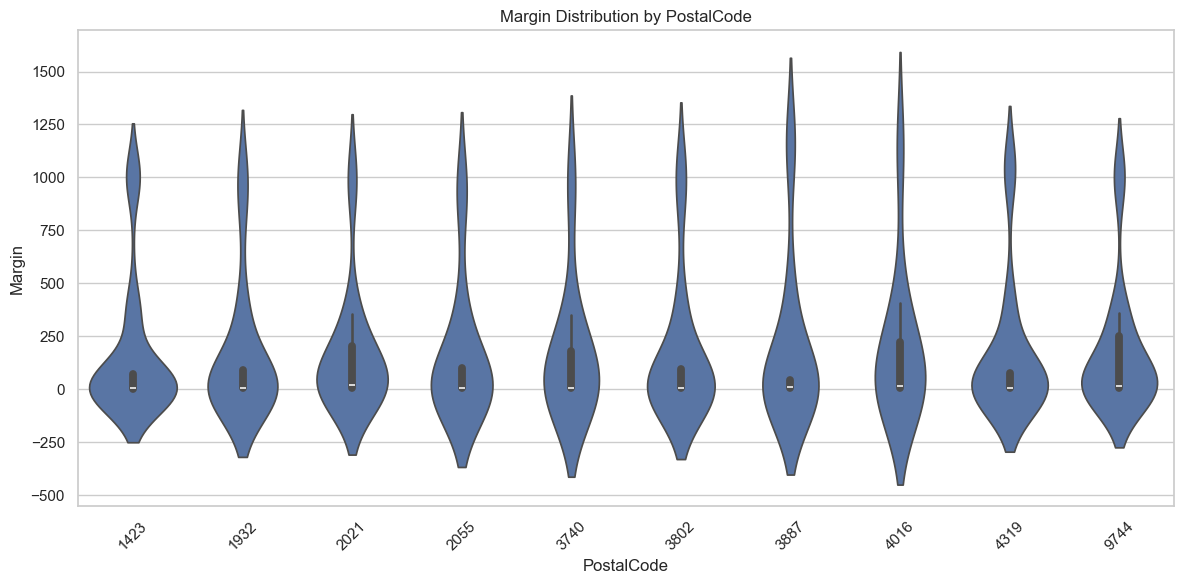

In [28]:
# Visualize margin distribution for top 10 zipcodes
zipcode_margins = calculate_profit_margin(data, 'PostalCode')
top_10_margin_zipcodes = zipcode_margins.nlargest(10, 'mean_margin').index
plt_margin = plot_margin_comparison(data[data['PostalCode'].isin(top_10_margin_zipcodes)], 
                                  'PostalCode')
plt.show()

In [16]:
# Hypothesis 4: Risk differences between genders
print("Hypothesis 4: Risk Differences Between Genders")
p_gender = perform_chi2_test(data, 'Gender', 'TotalClaims')
print(f"Chi-squared Test p-value: {p_gender}")


Hypothesis 4: Risk Differences Between Genders
Chi-squared Test p-value: 1.0


Summary of Results:
                             Hypothesis   p-value  Reject Null Hypothesis
0     Risk Differences Across Provinces  1.000000                   False
1    Risk Differences Between Zip Codes  0.502286                   False
2  Profit Differences Between Zip Codes  0.195909                   False
3      Risk Differences Between Genders  1.000000                   False


C:\Users\hp\AppData\Local\Temp\ipykernel_21516\3456584210.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hypothesis', y='p-value', data=results_df, palette='viridis')


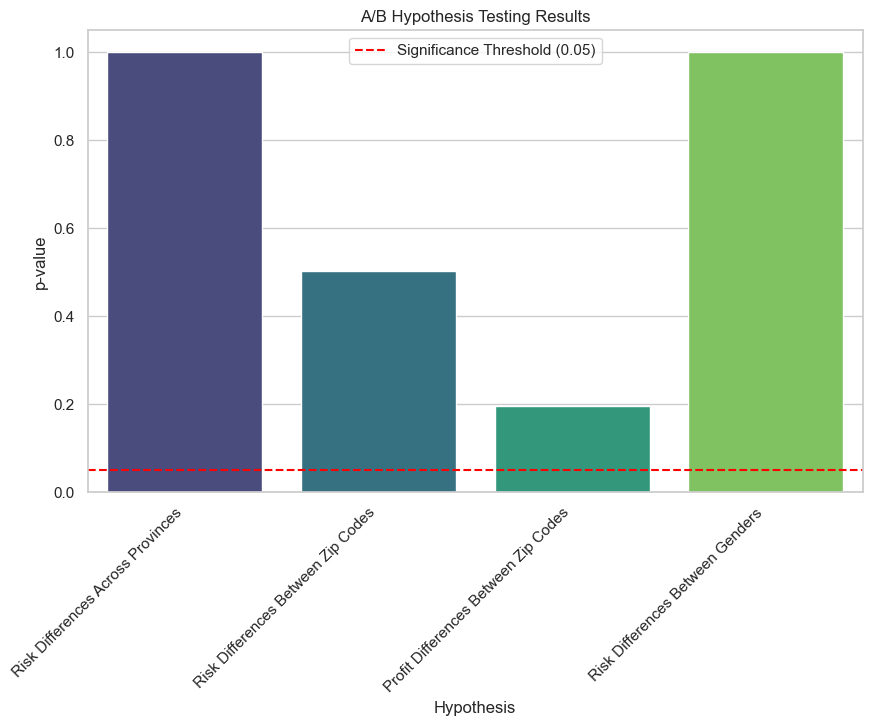

In [27]:
# Cell 5: Analyze and Report
results = {
    "Hypothesis": [
        "Risk Differences Across Provinces",
        "Risk Differences Between Zip Codes",
        "Profit Differences Between Zip Codes",
        "Risk Differences Between Genders"
    ],
    "p-value": [p_province, p_zip, p_profit, p_gender],
    "Reject Null Hypothesis": [p < 0.05 for p in [p_province, p_zip, p_profit, p_gender]]
}

results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)

# Visualization of key results
plt.figure(figsize=(10, 6))
sns.barplot(x='Hypothesis', y='p-value', data=results_df, palette='viridis')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xticks(rotation=45, ha='right')
plt.title("A/B Hypothesis Testing Results")
plt.legend()
plt.show()

# Save Results
results_df.to_csv("task3_results.csv", index=False)
